In [121]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import subprocess
import requests
from zipfile import ZipFile
import io
from keras import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.utils import np_utils

In [31]:
r = requests.get('http://ftp.cs.wisc.edu/machine-learning/shavlik-group/kuusisto.ecml14.simcustomerdata.zip')

text = ZipFile(io.BytesIO(r.content))

data = pd.read_csv(text.open('stereotypical_customer_simulation.csv'))

In [37]:
data['target'] = (data['target_control'] == 'target').astype(float)
data['response'] = (data['outcome'] == 'positive').astype(float)

d = pd.get_dummies(data[data['response']==1][feature_columns]).join(data[['target','response','customer_type']])

feature_columns = [col for col in d.columns.values if 'Node' in col]
response_column = 'response'
tc_column = 'target'
type_column = 'customer_type'

In [239]:
t_frac = 0.9

train_ix = np.random.choice(d.index, replace=False, size=int(len(d)*t_frac))
test_ix = [t for t in d.index if t not in train_ix]

d_train = d.loc[train_ix]
d_test = d.loc[test_ix]

In [240]:
# PARAMETERS

NUNITS = 500
LRATE = 1e-3

In [241]:
X_train = d_train[feature_columns].values
X_test = d_test[feature_columns].values

Y_train = np_utils.to_categorical(d_train['target'])
Y_test = np_utils.to_categorical(d_test['target'])

In [310]:
model = Sequential()

model.add(Dense(64,activation="relu"))
model.add(Dropout(.5))
model.add(BatchNormalization())
model.add(Dense(64,activation="relu"))
model.add(Dropout(.5))
model.add(BatchNormalization())
model.add(Dense(2,activation="softmax"))

In [311]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [312]:
# 9. Fit model on training data
model.fit(X_train, Y_train, batch_size=132, epochs=50, verbose=1)

Epoch 1/50
4457/4457 [==============================] - 1s 244us/step - loss: 1.0290 - acc: 0.5001
Epoch 2/50
4457/4457 [==============================] - 0s 31us/step - loss: 0.9281 - acc: 0.4920
Epoch 3/50
4457/4457 [==============================] - 0s 31us/step - loss: 0.8531 - acc: 0.4934
Epoch 4/50
4457/4457 [==============================] - 0s 33us/step - loss: 0.8020 - acc: 0.5129
Epoch 5/50
4457/4457 [==============================] - 0s 34us/step - loss: 0.7770 - acc: 0.5037
Epoch 6/50
4457/4457 [==============================] - 0s 32us/step - loss: 0.7326 - acc: 0.5380
Epoch 7/50
4457/4457 [==============================] - 0s 35us/step - loss: 0.7292 - acc: 0.5113
Epoch 8/50
4457/4457 [==============================] - 0s 32us/step - loss: 0.7247 - acc: 0.5111
Epoch 9/50
4457/4457 [==============================] - 0s 32us/step - loss: 0.7115 - acc: 0.5232
Epoch 10/50
4457/4457 [==============================] - 0s 32us/step - loss: 0.7041 - acc: 0.5228
Epoch 11/50
4457/4

In [313]:
in_sample_fit = model.predict(X_train)
in_sample_results = pd.DataFrame(list(zip(Y_train[:,1],in_sample_fit[:,1])))

In [314]:
fit = model.predict(X_test)

In [315]:
results = pd.DataFrame(list(zip(Y_test[:,1],fit[:,1])), columns=['actuals','fit'])
results['state'] = d_test['customer_type'].values

In [316]:
from sklearn.metrics import roc_auc_score, roc_curve

In [319]:
roc_auc_score(in_sample_results[0],in_sample_results[1])

0.7509886379155934

In [317]:
roc_auc_score(results['actuals'], results['fit'])

0.6113912930305199

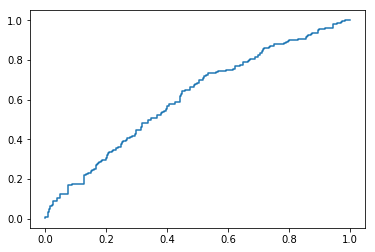

In [318]:
roc = roc_curve(results['actuals'], results['fit'])

plt.plot(roc[0],roc[1])

In [323]:
results.sort_values(by='fit',ascending=False
                   )['actuals'][:100].sum(),results.sort_values(by='fit',ascending=True)['actuals'][:100].sum()

(62.0, 35.0)

In [260]:
results.sort_values(by=1,ascending=False)[0][:100].sum(),results.sort_values(by=1,ascending=True)[0][:100].sum()

(66.0, 39.0)

In [252]:
results.shape

(496, 2)

In [253]:
len(d)

4953

In [220]:
results.sort_values(by=1,ascending=False)[:250][0].sum()

141.0

In [221]:
results.sort_values(by=1,ascending=True)[:250][0].sum()

101.0

In [222]:
results.sort_values(by=1,ascending=False)[:250][0].sum() / results.sort_values(by=1,ascending=True)[:250][0].sum()

1.396039603960396

In [209]:
148/92

1.608695652173913

1338.3271144278606

In [109]:
count = 1

with tf.Session(graph=igraph) as sess:
    sess.run(init)
    np.random.shuffle(train_ix)
    for i in range(4097):
        j = int((len(train_ix) / 100) * (i % 100))
        batch = train_ix[j:j+100]
        if len(batch) < 100:
            np.random.shuffle(train_ix)
            batch = train_ix[j:j*100]
        d_batch = d_train.loc[batch]
        feed_dict = {
            context:d_batch[feature_columns],
            #response:d_batch[['response']],
            target:d_batch[['target']],
            training:True
        }
        sess.run(optimizer, feed_dict=feed_dict)
        if i == count:
            feed_dict = {
            context:d_test[feature_columns],
            #response:d_test[['response']],
            target:d_test[['target']],
            training:False
            }
            out = sess.run(cost, feed_dict=feed_dict)
            print(out)
            count += count
            out = sess.run(y_hat, feed_dict=feed_dict)

0.6798446
0.6794783
0.6796832
0.68032956
0.67779905
0.6791753
0.6801367
0.6827709
0.68155646
0.6850749
0.70045596
0.712758
0.7460946


In [116]:
results = pd.DataFrame(list(zip(d_test['customer_type'],out[:,1])), columns=['type','score'])

In [120]:
results.groupby('type').agg([np.mean,np.std])

score          
                  mean       std
type                            
persuadable   0.469606  0.169919
sleeping_dog  0.456504  0.150178
sure_thing    0.454884  0.152348

In [261]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [294]:
_ = pca.fit(pd.get_dummies(data)[feature_columns])
pca_train = pca.transform(pd.get_dummies(data)[feature_columns])

In [295]:
pcanalysis = pd.DataFrame(pca_train, columns=['PC1','PC2'])
pcanalysis['customer_type'] = data['customer_type']

In [307]:
[(i % 2,int(i/2)) for i in range(4)]

[(0, 0), (1, 0), (0, 1), (1, 1)]

persuadable
sleeping_dog
lost_cause
sure_thing


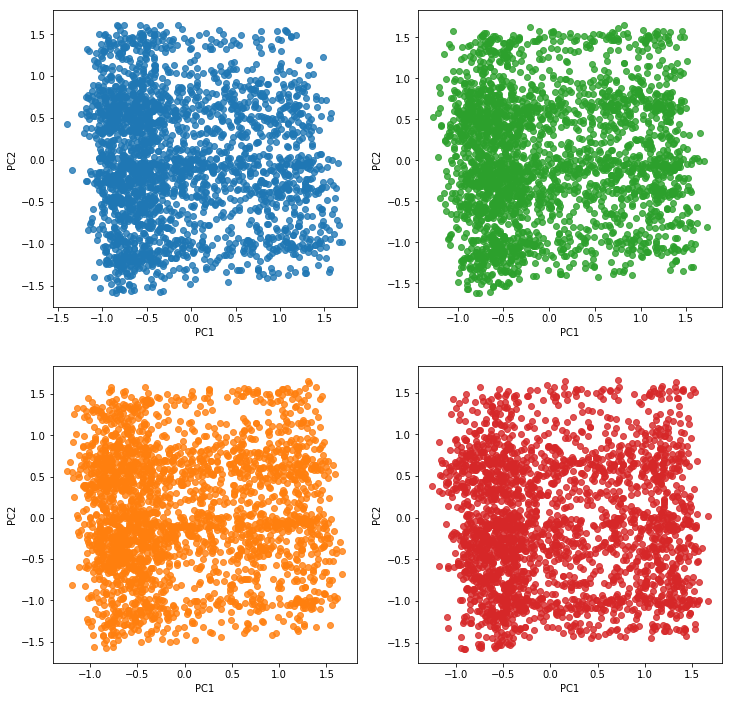

In [309]:
fig, axes = plt.subplots(2,2,figsize=(12,12))
i = -1
for itype in ['persuadable','sleeping_dog','lost_cause','sure_thing']:
    print(itype)
    i += 1 
    to_plot = pcanalysis[pcanalysis['customer_type'] == itype]
    sns.regplot(x='PC1', y='PC2', data=to_plot, fit_reg=False, ax=axes[i%2][int(i/2)])

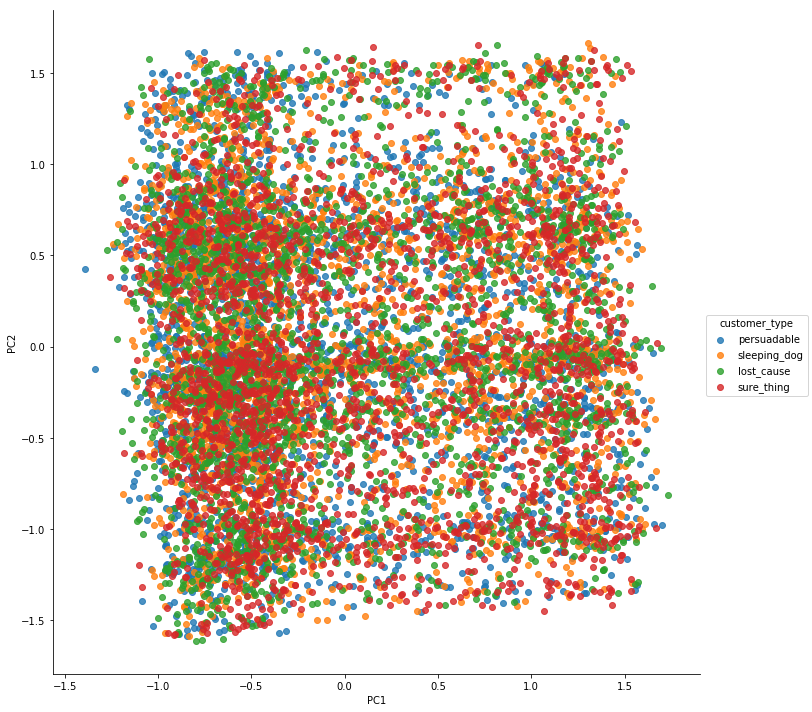

In [296]:
sns.lmplot('PC1','PC2',pcanalysis, hue='customer_type', fit_reg=False, size=10)

In [283]:
pca.explained_variance_ratio_

array([0.04549296, 0.04212823])

In [332]:
1 / 1.005**1000

0.006822416727412042